In [73]:
import pandas as pd
import numpy as np
import plotly.express as px

# 서울시 구별 5대 강력범죄 연관요소 탐구
## 서울시 열린데이터 광장 데이터 사용

### 발단 : 대림, 구로 등 중국 동포분들이 많은 지역에는 이런 이미지가 박혀 있습니다
* [대림동, ‘범죄도시’ 이미지 낙인 벗겨낼까](https://moneys.mt.co.kr/news/mwView.php?no=2019032709008061669)
* ["저희 범죄도시 아니에요" 대림동 차이나타운의 속사정](http://hub.zum.com/fnnews/37938)
* [“또 중국동포 범죄?” vs “바른 인식 가져달라”…중국동포 포비아 논란](https://www.asiae.co.kr/article/2019012315091070930)

### 진짜 중국 국적 외국인 밀집 지역에서 범죄가 많이 일어날까?
### 서울시 구별 중국국적 외국인 수와 5대 범죄 발생건수 연관분석

* 5대 강력범죄?
    * 살인, 강도, 강간및강제추행, 절도. 폭력
* 사용한 데이터
     * [서울시 5대 범죄 발생현황 통계 (구별) (2014~2018)](http://data.seoul.go.kr/dataList/datasetView.do?infId=316&srvType=S&serviceKind=2&currentPageNo=1)
     * [서울시 등록외국인 현황 (국적별/구별) 통계 (2014~2018)](http://data.seoul.go.kr/dataList/datasetView.do?infId=803&srvType=S&serviceKind=2&currentPageNo=1)
     * [서울시 1인당 사회복지 예산액 통계](http://data.seoul.go.kr/dataList/datasetView.do?infId=10685&srvType=S&serviceKind=2&currentPageNo=1)
     * [서울시 지역구별 지하철역 수 (2019)](https://1boon.kakao.com/zigbang/5db2aa996654465edc2185bf)
     * [서울시 주민등록 전입지별 인구이동 통계](https://data.seoul.go.kr/dataList/datasetView.do?infId=10213&srvType=S&serviceKind=2)

## 1. 전처리
연도와 구를 공통 열로 두고 가공하여 merge
* 원하는 열, 행만 가져오기
* 데이터 타입 조정
* 결측값 조정

In [74]:
# 파일을 불러와서 데이터프레임 생성
foreigner_num_origin = pd.read_csv('./데이터/서울시 외국인 주민(국적별) 통계 2013-2018.csv'
                                              ,encoding='utf-8', skiprows=1, thousands=',')
foreigner_num_origin

,기간,구분,성별,합계,소계,중국,중국(한국계),대만,일본,몽골,...,캐나다,소계.4,러시아,러시아(한국계),영국,기타.3,오세아니아,중남미,아프리카,기타.4
0,2013,합계,계,395640.0,303856.0,51179.0,225201.0,9847.0,12482.0,5147.0,...,NaN,NaN,"2,088",NaN,NaN,NaN,NaN,NaN,NaN,"24,783"
1,2013,합계,남자,179261.0,134075.0,19632.0,102453.0,4989.0,4947.0,2054.0,...,NaN,NaN,713,NaN,NaN,NaN,NaN,NaN,NaN,"13,902"
2,2013,합계,여자,216379.0,169781.0,31547.0,122748.0,4858.0,7535.0,3093.0,...,NaN,NaN,"1,375",NaN,NaN,NaN,NaN,NaN,NaN,"10,881"
3,2013,종로구,계,11880.0,7981.0,2584.0,4665.0,272.0,310.0,150.0,...,NaN,NaN,62,NaN,NaN,NaN,NaN,NaN,NaN,"1,005"
4,2013,종로구,남자,5342.0,3286.0,1042.0,1952.0,125.0,118.0,49.0,...,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2018,강동구,계,6384.0,4570.0,652.0,3581.0,32.0,117.0,188.0,...,159.0,76.0,29,8,18,21,77,17,17,***
464,2018,강동구,남자,3034.0,2140.0,283.0,1761.0,12.0,11.0,73.0,...,79.0,45.0,17,***,13,12,45,10,9,***
465,2018,강동구,여자,3350.0,2430.0,369.0,1820.0,20.0,106.0,115.0,...,80.0,31.0,12,5,5,9,32,7,8,***
466,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cache_foreigner = foreigner_num_origin.drop([len(foreigner_num_origin)-2, len(foreigner_num_origin)-1],0)
# 마지막 2줄을 지움. 전체가 다 NaN 값
cache_foreigner = cache_foreigner[(cache_foreigner['성별'] == '계')]
cache_foreigner = cache_foreigner[(cache_foreigner['구분'] != '합계')]
cache_foreigner = cache_foreigner[(cache_foreigner['기간'] > 2013)]
cache_foreigner.rename(columns={'구분':'자치구'}, inplace=True)
cache_foreigner

,기간,자치구,성별,합계,소계,중국,중국(한국계),대만,일본,몽골,...,캐나다,소계.4,러시아,러시아(한국계),영국,기타.3,오세아니아,중남미,아프리카,기타.4
81,2014,종로구,계,11998.0,8093.0,2641.0,4704.0,312.0,315.0,121.0,...,NaN,NaN,51,NaN,NaN,NaN,NaN,NaN,NaN,"1,025"
84,2014,중구,계,11559.0,7860.0,1805.0,4647.0,731.0,303.0,374.0,...,NaN,NaN,382,NaN,NaN,NaN,NaN,NaN,NaN,764
87,2014,용산구,계,18573.0,7399.0,1032.0,3730.0,401.0,2082.0,154.0,...,NaN,NaN,342,NaN,NaN,NaN,NaN,NaN,NaN,"4,158"
90,2014,성동구,계,12399.0,9017.0,2329.0,5964.0,210.0,239.0,275.0,...,NaN,NaN,56,NaN,NaN,NaN,NaN,NaN,NaN,791
93,2014,광진구,계,20187.0,17499.0,3862.0,12692.0,164.0,550.0,231.0,...,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN,550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,2018,관악구,계,25418.0,20724.0,3347.0,16736.0,130.0,253.0,258.0,...,199.0,745.0,153,50,78,464,81,102,203,***
454,2018,서초구,계,7143.0,2065.0,706.0,1070.0,95.0,160.0,34.0,...,637.0,741.0,50,11,104,576,241,42,72,***
457,2018,강남구,계,8814.0,2752.0,1135.0,1197.0,81.0,273.0,66.0,...,792.0,452.0,61,***,103,285,253,27,64,***
460,2018,송파구,계,10123.0,6393.0,1050.0,4941.0,85.0,207.0,110.0,...,460.0,284.0,42,14,50,178,169,47,38,***


In [5]:
chinese_num = cache_foreigner.set_index(keys=['자치구','기간'])[['중국', '중국(한국계)']]
chinese_num

,,중국,중국(한국계)
자치구,기간,,
종로구,2014,2641.0,4704.0
중구,2014,1805.0,4647.0
용산구,2014,1032.0,3730.0
성동구,2014,2329.0,5964.0
광진구,2014,3862.0,12692.0
...,...,...,...
관악구,2018,3347.0,16736.0
서초구,2018,706.0,1070.0
강남구,2018,1135.0,1197.0


In [6]:
chinese_num['중국국적총합'] = chinese_num['중국'] + chinese_num['중국(한국계)']

In [7]:
chinese_num

,,중국,중국(한국계),중국국적총합
자치구,기간,,,
종로구,2014,2641.0,4704.0,7345.0
중구,2014,1805.0,4647.0,6452.0
용산구,2014,1032.0,3730.0,4762.0
성동구,2014,2329.0,5964.0,8293.0
광진구,2014,3862.0,12692.0,16554.0
...,...,...,...,...
관악구,2018,3347.0,16736.0,20083.0
서초구,2018,706.0,1070.0,1776.0
강남구,2018,1135.0,1197.0,2332.0


In [8]:
chinese_num_total = chinese_num[['중국국적총합']]
chinese_num_total

,,중국국적총합
자치구,기간,
종로구,2014,7345.0
중구,2014,6452.0
용산구,2014,4762.0
성동구,2014,8293.0
광진구,2014,16554.0
...,...,...
관악구,2018,20083.0
서초구,2018,1776.0
강남구,2018,2332.0


In [9]:
crime_most_five = pd.read_csv('./데이터/서울시 5대 범죄 발생현황 2014-2018.csv'
                                              ,encoding='utf-8', thousands=',')
crime_most_five

,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2018,합계,"101,948","74,487",143,139,143,151,"6,412","6,046","39,175","19,762","56,075","48,389"
2,2018,종로구,"3,690","3,913",6,7,3,7,236,"1,100","1,483",969,"1,962","1,830"
3,2018,중구,"4,030","2,679",2,2,11,11,207,115,"1,855",832,"1,955","1,719"
4,2018,용산구,"3,411","2,543",1,1,3,2,331,285,"1,096",522,"1,980","1,733"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2014,관악구,"6,781","3,701",7,8,25,22,361,238,"3,029",784,"3,359","2,649"
127,2014,서초구,"5,558","3,122",6,9,14,12,285,184,"2,747",782,"2,506","2,135"
128,2014,강남구,"8,851","5,262",13,9,37,29,512,403,"3,895","1,193","4,394","3,628"
129,2014,송파구,"8,004","3,982",9,8,9,10,255,195,"4,199",885,"3,532","2,884"


In [10]:
crime_most_five = crime_most_five[(crime_most_five['자치구'] != '합계')].drop(0)
# 첫 열 제거, 합계 제거

In [11]:
crime_most_five = crime_most_five.set_index(keys=['자치구','기간'])[['합계', '살인', '강도', '강간강제추행', '절도', '폭력']]

In [12]:
crime_most_five

,,합계,살인,강도,강간강제추행,절도,폭력
자치구,기간,,,,,,
종로구,2018,"3,690",6,3,236,"1,483","1,962"
중구,2018,"4,030",2,11,207,"1,855","1,955"
용산구,2018,"3,411",1,3,331,"1,096","1,980"
성동구,2018,"2,457",2,5,126,999,"1,325"
광진구,2018,"3,915",7,2,229,"1,769","1,908"
...,...,...,...,...,...,...,...
관악구,2014,"6,781",7,25,361,"3,029","3,359"
서초구,2014,"5,558",6,14,285,"2,747","2,506"
강남구,2014,"8,851",13,37,512,"3,895","4,394"


In [13]:
chinese_num_total

,,중국국적총합
자치구,기간,
종로구,2014,7345.0
중구,2014,6452.0
용산구,2014,4762.0
성동구,2014,8293.0
광진구,2014,16554.0
...,...,...
관악구,2018,20083.0
서초구,2018,1776.0
강남구,2018,2332.0


In [14]:
crime_most_five.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     125 non-null    object
 1   기간      125 non-null    object
 2   합계      125 non-null    object
 3   살인      125 non-null    object
 4   강도      125 non-null    object
 5   강간강제추행  125 non-null    object
 6   절도      125 non-null    object
 7   폭력      125 non-null    object
dtypes: object(8)
memory usage: 7.9+ KB


In [16]:
chinese_num_total2 =  chinese_num_total.reset_index()
chinese_num_total2['기간'] = chinese_num_total2['기간'].astype('str')

In [18]:
result = chinese_num_total2.merge(crime_most_five.reset_index(),how='left')
result

,자치구,기간,중국국적총합,합계,살인,강도,강간강제추행,절도,폭력
0,종로구,2014,7345.0,"5,021",3,12,226,"2,272","2,508"
1,중구,2014,6452.0,"5,231",6,13,221,"2,576","2,415"
2,용산구,2014,4762.0,"3,799",1,7,213,"1,560","2,018"
3,성동구,2014,8293.0,"3,582",1,5,141,"1,753","1,682"
4,광진구,2014,16554.0,"6,268",8,16,249,"3,167","2,828"
...,...,...,...,...,...,...,...,...,...
120,관악구,2018,20083.0,"5,026",9,10,352,"2,012","2,643"
121,서초구,2018,1776.0,"4,726",5,5,470,"1,851","2,395"
122,강남구,2018,2332.0,"7,513",10,14,600,"3,004","3,885"
123,송파구,2018,5991.0,"5,807",5,6,309,"2,352","3,135"


In [19]:
result2 = result.set_index('자치구')
result2

,기간,중국국적총합,합계,살인,강도,강간강제추행,절도,폭력
자치구,,,,,,,,
종로구,2014,7345.0,"5,021",3,12,226,"2,272","2,508"
중구,2014,6452.0,"5,231",6,13,221,"2,576","2,415"
용산구,2014,4762.0,"3,799",1,7,213,"1,560","2,018"
성동구,2014,8293.0,"3,582",1,5,141,"1,753","1,682"
광진구,2014,16554.0,"6,268",8,16,249,"3,167","2,828"
...,...,...,...,...,...,...,...,...
관악구,2018,20083.0,"5,026",9,10,352,"2,012","2,643"
서초구,2018,1776.0,"4,726",5,5,470,"1,851","2,395"
강남구,2018,2332.0,"7,513",10,14,600,"3,004","3,885"


In [20]:
result2['기간'] = result2['기간'].astype('int')
result2['합계'] =result2['합계'].str.replace(',', '')
result2['절도'] =result2['절도'].str.replace(',', '')
result2['폭력'] =result2['폭력'].str.replace(',', '')
result2['합계'] = result2['합계'].astype('float')
result2['절도'] = result2['절도'].astype('float')
result2['폭력'] = result2['폭력'].astype('float')
result2['살인'] = result2['살인'].astype('float')
result2['강도'] = result2['강도'].astype('float')
result2['강간강제추행'] = result2['강간강제추행'].astype('float')

In [21]:
result2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 종로구 to 강동구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      125 non-null    int64  
 1   중국국적총합  125 non-null    float64
 2   합계      125 non-null    float64
 3   살인      125 non-null    float64
 4   강도      125 non-null    float64
 5   강간강제추행  125 non-null    float64
 6   절도      125 non-null    float64
 7   폭력      125 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 8.8+ KB


In [22]:
result2
result2.rename(columns={'합계' : '5대범죄_발생총합건수'}, inplace=True)

### 각 범죄 별, 중국 국적 외국인 수와 범죄 건수 시각화
#### 그래프 하단의 화살표를 누르면, 연도 별 변화를 애니메이션으로 확인할 수 있음

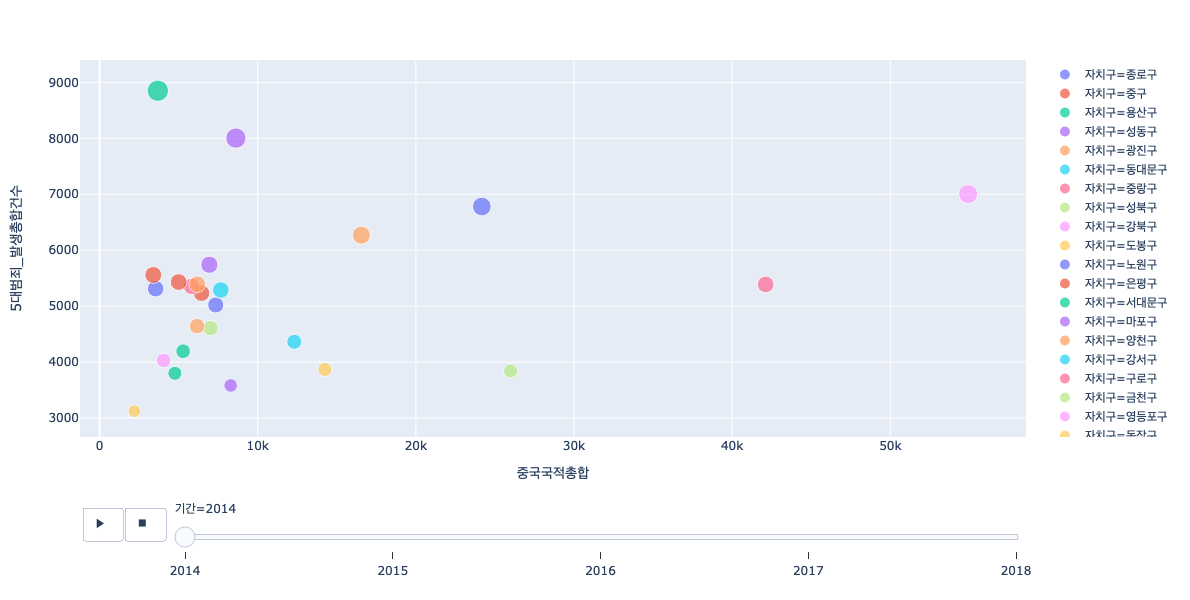

In [24]:
# Scattor plot의 모양새나, 연도별 변화를 봐도 두 변인 사이에 별 관계가 없어 보임
fig = px.scatter(result2.reset_index(), x='중국국적총합', y='5대범죄_발생총합건수',
              color='자치구', size_max=15, size='5대범죄_발생총합건수', width=600, height=600
                ,animation_frame='기간')
fig.show()

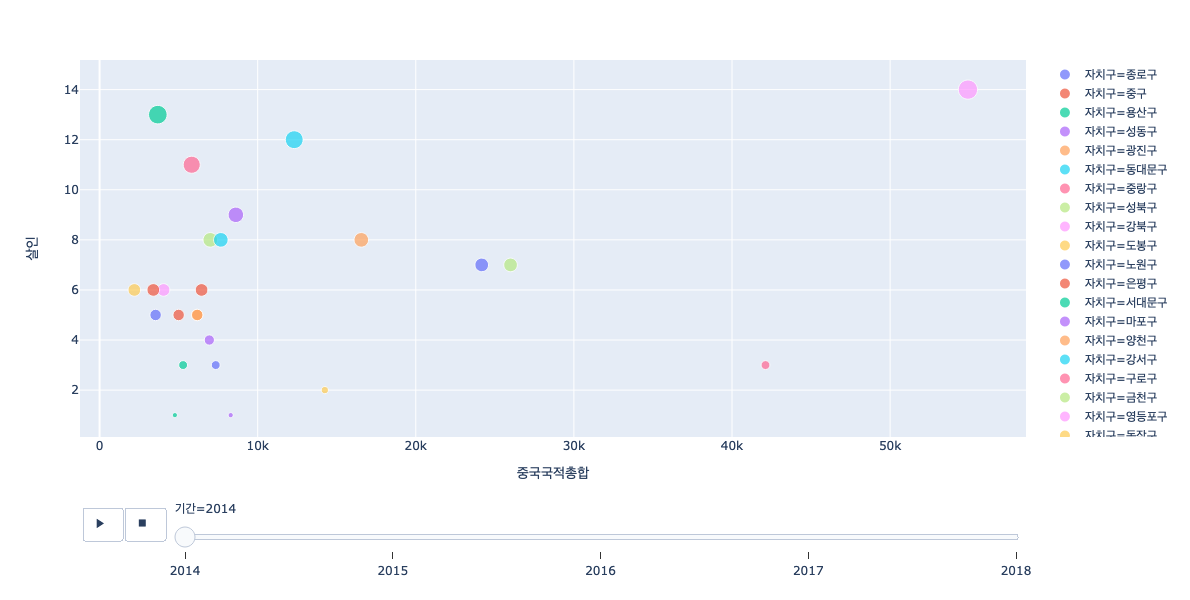

In [25]:
fig = px.scatter(result2.reset_index(), x='중국국적총합', y='살인',
              color='자치구', size_max=15, size='살인', width=600, height=600
                ,animation_frame='기간')
fig.show()

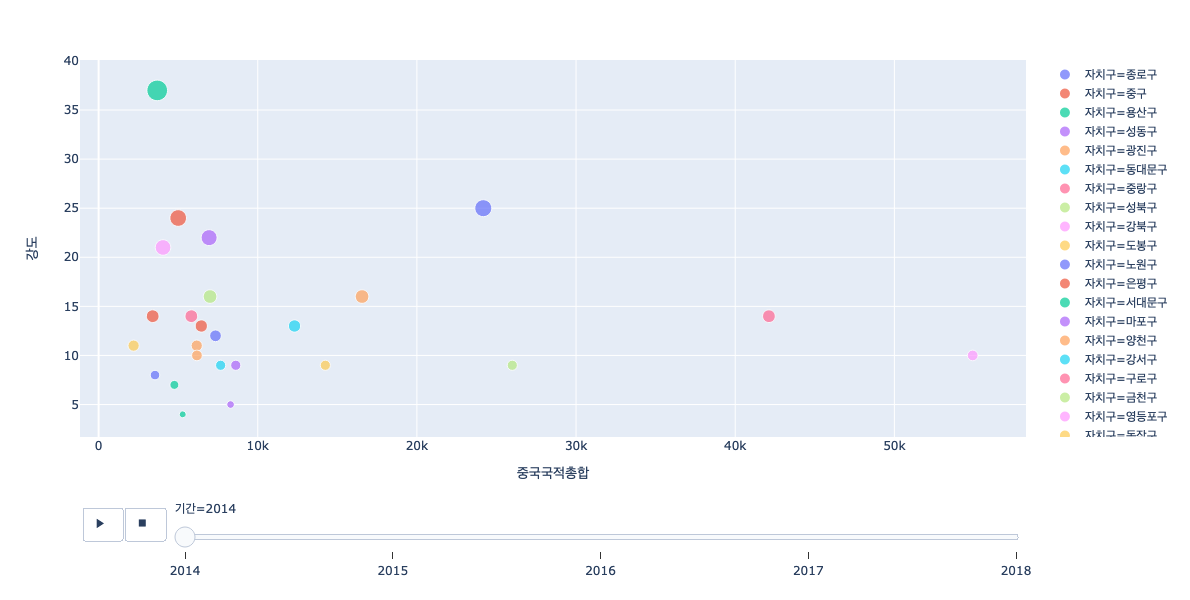

In [26]:
fig = px.scatter(result2.reset_index(), x='중국국적총합', y='강도',
              color='자치구', size_max=15, size='강도', width=600, height=600
                ,animation_frame='기간')
fig.show()

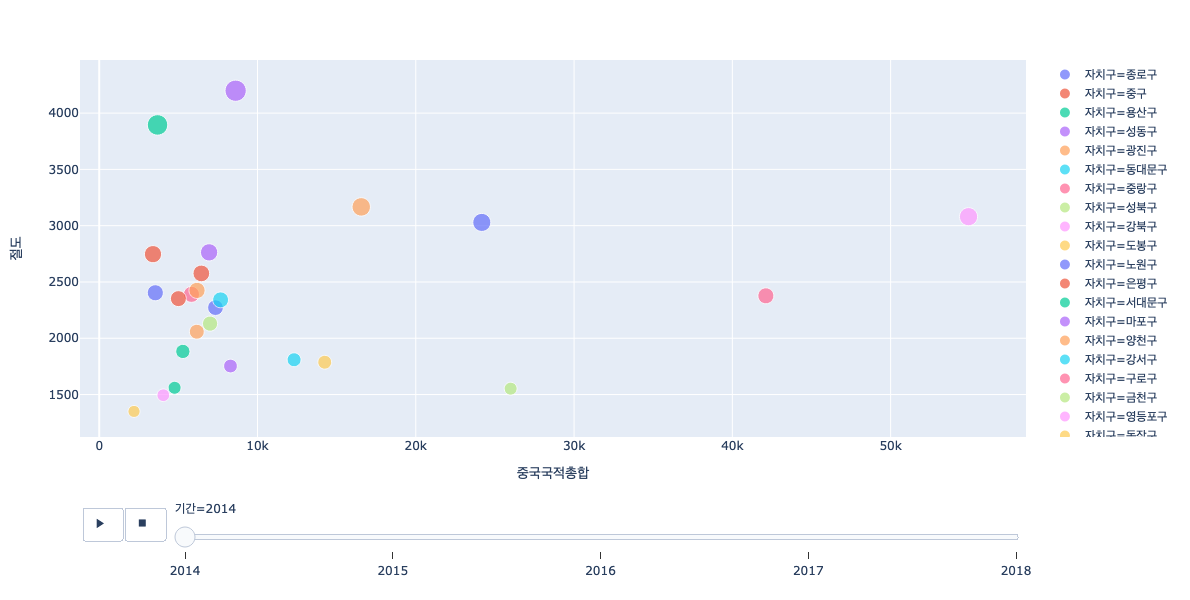

In [27]:
fig = px.scatter(result2.reset_index(), x='중국국적총합', y='절도',
              color='자치구', size_max=15, size='절도', width=600, height=600
                ,animation_frame='기간')
fig.show()

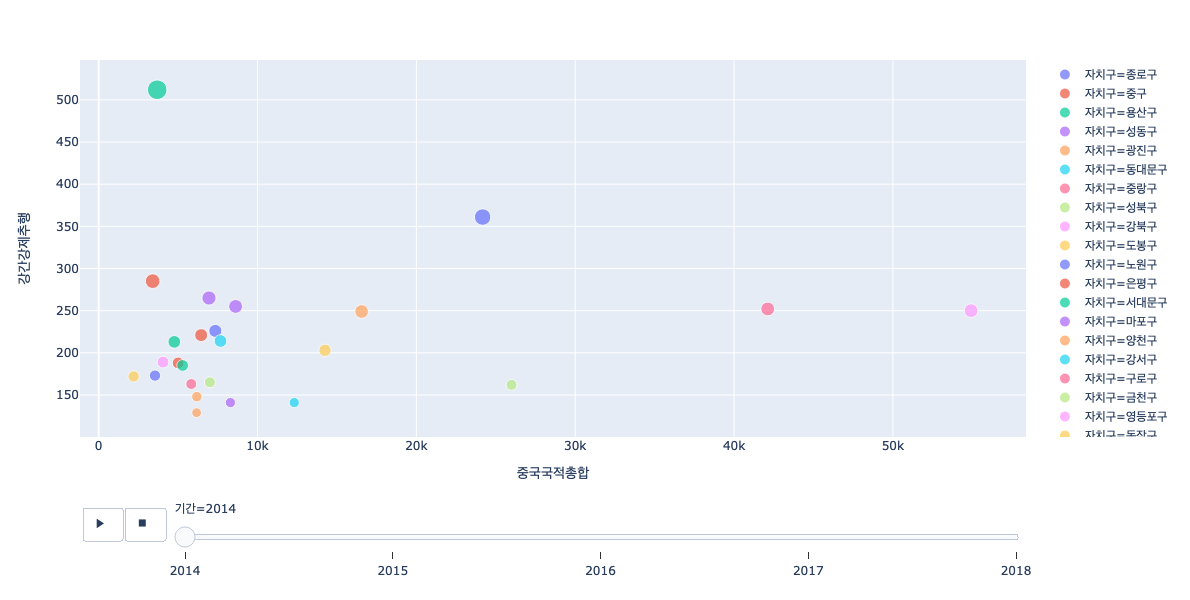

In [28]:
fig = px.scatter(result2.reset_index(), x='중국국적총합', y='강간강제추행',
              color='자치구', size_max=15, size='강간강제추행', width=600, height=600
                ,animation_frame='기간')
fig.show()

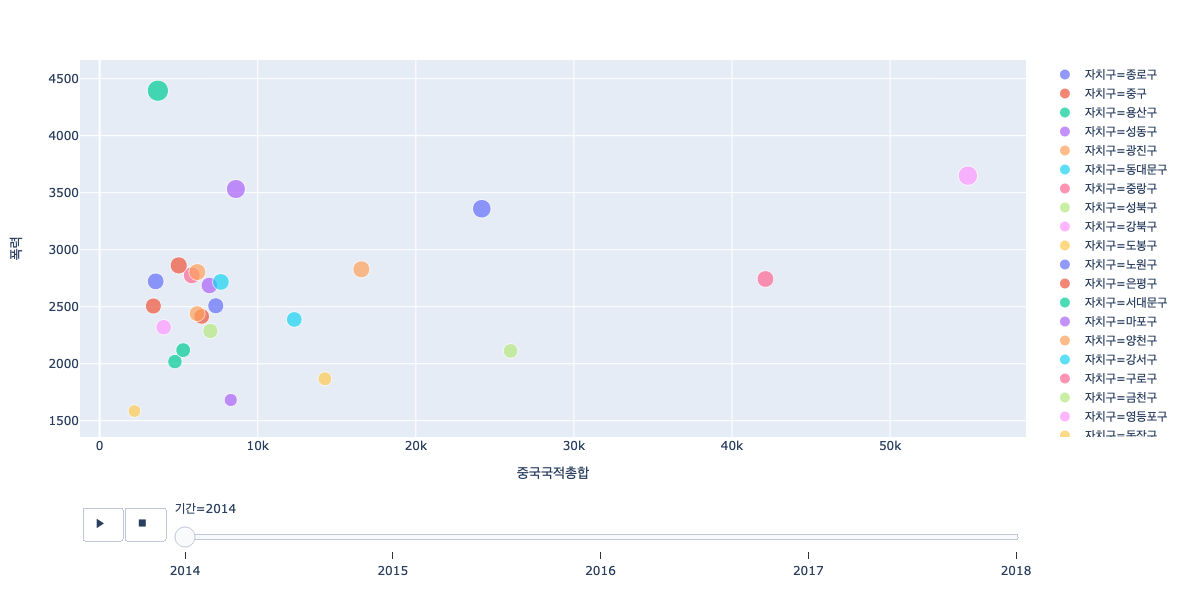

In [29]:
fig = px.scatter(result2.reset_index(), x='중국국적총합', y='폭력',
              color='자치구', size_max=15, size='폭력', width=600, height=600
                ,animation_frame='기간')
fig.show()

### 상관계수 확인

In [30]:
# 2018년만 가져와서 상관계수를 구함
temp = result2.reset_index()
for_corr = temp[(temp['기간']==2018) & (temp['자치구'] != '영등포구')].loc[:, '중국국적총합':]
for_corr2 = temp[(temp['기간']==2018)].loc[:, '중국국적총합':]
for_corr

,중국국적총합,5대범죄_발생총합건수,살인,강도,강간강제추행,절도,폭력
100,6493.0,3690.0,6.0,3.0,236.0,1483.0,1962.0
101,5725.0,4030.0,2.0,11.0,207.0,1855.0,1955.0
102,2802.0,3411.0,1.0,3.0,331.0,1096.0,1980.0
103,6653.0,2457.0,2.0,5.0,126.0,999.0,1325.0
104,14473.0,3915.0,7.0,2.0,229.0,1769.0,1908.0
105,11494.0,3680.0,2.0,5.0,145.0,1447.0,2081.0
106,3487.0,4288.0,4.0,3.0,174.0,1526.0,2581.0
107,7206.0,3042.0,7.0,1.0,183.0,1164.0,1687.0
108,2743.0,3437.0,8.0,7.0,188.0,1112.0,2122.0
109,1241.0,2249.0,1.0,5.0,113.0,781.0,1349.0


In [31]:
# 2018년 기준 각 요소들의 상관관계
for_corr2.corr(method='pearson')

,중국국적총합,5대범죄_발생총합건수,살인,강도,강간강제추행,절도,폭력
중국국적총합,1.000000,0.241903,0.557359,0.302846,0.118571,0.220225,0.260172
5대범죄_발생총합건수,0.241903,1.000000,0.594612,0.606587,0.801312,0.971584,0.974444
살인,0.557359,0.594612,1.000000,0.271016,0.469315,0.542147,0.607344
강도,0.302846,0.606587,0.271016,1.000000,0.496463,0.609513,0.569268
강간강제추행,0.118571,0.801312,0.469315,0.496463,1.000000,0.767011,0.717707
절도,0.220225,0.971584,0.542147,0.609513,0.767011,1.000000,0.902027
폭력,0.260172,0.974444,0.607344,0.569268,0.717707,0.902027,1.000000


###  중국 국적 외국인 인구수와 5대 강력범죄 발생 건수는 큰 상관이 없다
* 한계점 : '등록' 외국인 대상이기 때문에, 불법체류자의 영향은 알 수 없음
    * 구별 불법체류자 추정 수도 알 수 있으면, 더 좋은 분석이 될 수 있음
* 살인의 경우, 영등포구라는 이상값을 제외하면 계수가 0.26이 나옴

In [32]:
# 영등포구를 제외한다면
for_corr.corr(method='pearson')

,중국국적총합,5대범죄_발생총합건수,살인,강도,강간강제추행,절도,폭력
중국국적총합,1.000000,0.063155,0.260940,0.268643,-0.033064,0.044569,0.090311
5대범죄_발생총합건수,0.063155,1.000000,0.541375,0.595181,0.789114,0.968766,0.971732
살인,0.260940,0.541375,1.000000,0.227909,0.431302,0.478686,0.560923
강도,0.268643,0.595181,0.227909,1.000000,0.479638,0.597801,0.555354
강간강제추행,-0.033064,0.789114,0.431302,0.479638,1.000000,0.751955,0.698744
절도,0.044569,0.968766,0.478686,0.597801,0.751955,1.000000,0.892135
폭력,0.090311,0.971732,0.560923,0.555354,0.698744,0.892135,1.000000


In [33]:
# 앞으로 계속 사용할 정제된 crime_most_five 만들기
crime_most_five = crime_most_five.reset_index()

In [34]:
def str_remove_comma_to_int(df, target_columns):
    for each in target_columns:
        df[each] = df[each].str.replace(',', '')
        df[each] = df[each].astype(int)

In [35]:
str_remove_comma_to_int(crime_most_five, ['기간', '합계', '살인', '강도', '강간강제추행', '절도', '폭력'])

In [36]:
crime_most_five # 이제 계속 이걸 사용하면 됨

,자치구,기간,합계,살인,강도,강간강제추행,절도,폭력
0,종로구,2018,3690,6,3,236,1483,1962
1,중구,2018,4030,2,11,207,1855,1955
2,용산구,2018,3411,1,3,331,1096,1980
3,성동구,2018,2457,2,5,126,999,1325
4,광진구,2018,3915,7,2,229,1769,1908
...,...,...,...,...,...,...,...,...
120,관악구,2014,6781,7,25,361,3029,3359
121,서초구,2014,5558,6,14,285,2747,2506
122,강남구,2014,8851,13,37,512,3895,4394
123,송파구,2014,8004,9,9,255,4199,3532


## 2. 5대 강력범죄 발생건수와 상관계수가 높은 다른 요소도 있을까?

### 1. 구별 사회복지 예산액
* 사용한 데이터
     * 서울시 5대 범죄 발생현황 통계 (구별) (2014~2018)
     * 서울시 1인당 사회복지 예산액 통계 (2014-2017)

In [37]:
welfare_budget = pd.read_csv('./데이터/서울시 1인당 사회복지 예산액 통계 2010-2017.csv', encoding='utf-8', thousands=',', sep='\t')
welfare_budget

,기간,구분,금액(천원/명),상대격차(배),절대격차(천원/명)
0,2010,자치구 평균,283.7,-,-
1,2010,종로구,319.0,1.12,35.3
2,2010,중구,521.0,1.84,237.3
3,2010,용산구,293.9,1.04,10.2
4,2010,성동구,288.9,1.02,5.2
...,...,...,...,...,...
203,2017,관악구,621.7,0.93,-44.4
204,2017,서초구,487.8,0.73,-178.3
205,2017,강남구,537.6,0.81,-128.4
206,2017,송파구,481.2,0.72,-184.8


In [38]:
welfare_budget_from2014 = welfare_budget[(welfare_budget['기간'] > 2013) & (welfare_budget['구분'] != '자치구 평균')]
welfare_budget_from2014.rename(columns={'구분' : '자치구'}, inplace=True)
welfare_budget_from2014

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,기간,자치구,금액(천원/명),상대격차(배),절대격차(천원/명)
105,2014,종로구,608.0,1.22,109.8
106,2014,중구,702.8,1.41,204.7
107,2014,용산구,486.6,0.98,-11.5
108,2014,성동구,495.6,0.99,-2.6
109,2014,광진구,414.9,0.83,-83.2
...,...,...,...,...,...
203,2017,관악구,621.7,0.93,-44.4
204,2017,서초구,487.8,0.73,-178.3
205,2017,강남구,537.6,0.81,-128.4
206,2017,송파구,481.2,0.72,-184.8


In [39]:
crime_most_five_end2017 = crime_most_five[crime_most_five['기간'] < 2018]
crime_most_five_end2017

,자치구,기간,합계,살인,강도,강간강제추행,절도,폭력
25,종로구,2017,4057,7,10,253,1644,2143
26,중구,2017,4184,1,9,267,1846,2061
27,용산구,2017,4060,1,5,327,1346,2381
28,성동구,2017,2767,1,3,132,1072,1559
29,광진구,2017,4646,6,13,261,2220,2146
...,...,...,...,...,...,...,...,...
120,관악구,2014,6781,7,25,361,3029,3359
121,서초구,2014,5558,6,14,285,2747,2506
122,강남구,2014,8851,13,37,512,3895,4394
123,송파구,2014,8004,9,9,255,4199,3532


In [40]:
result = welfare_budget_from2014.merge(crime_most_five_end2017, how='left')
result

,기간,자치구,금액(천원/명),상대격차(배),절대격차(천원/명),합계,살인,강도,강간강제추행,절도,폭력
0,2014,종로구,608.0,1.22,109.8,5021,3,12,226,2272,2508
1,2014,중구,702.8,1.41,204.7,5231,6,13,221,2576,2415
2,2014,용산구,486.6,0.98,-11.5,3799,1,7,213,1560,2018
3,2014,성동구,495.6,0.99,-2.6,3582,1,5,141,1753,1682
4,2014,광진구,414.9,0.83,-83.2,6268,8,16,249,3167,2828
...,...,...,...,...,...,...,...,...,...,...,...
95,2017,관악구,621.7,0.93,-44.4,5525,8,7,379,1979,3152
96,2017,서초구,487.8,0.73,-178.3,4708,9,13,470,1812,2404
97,2017,강남구,537.6,0.81,-128.4,7720,7,20,607,3130,3956
98,2017,송파구,481.2,0.72,-184.8,5576,6,1,288,2274,3007


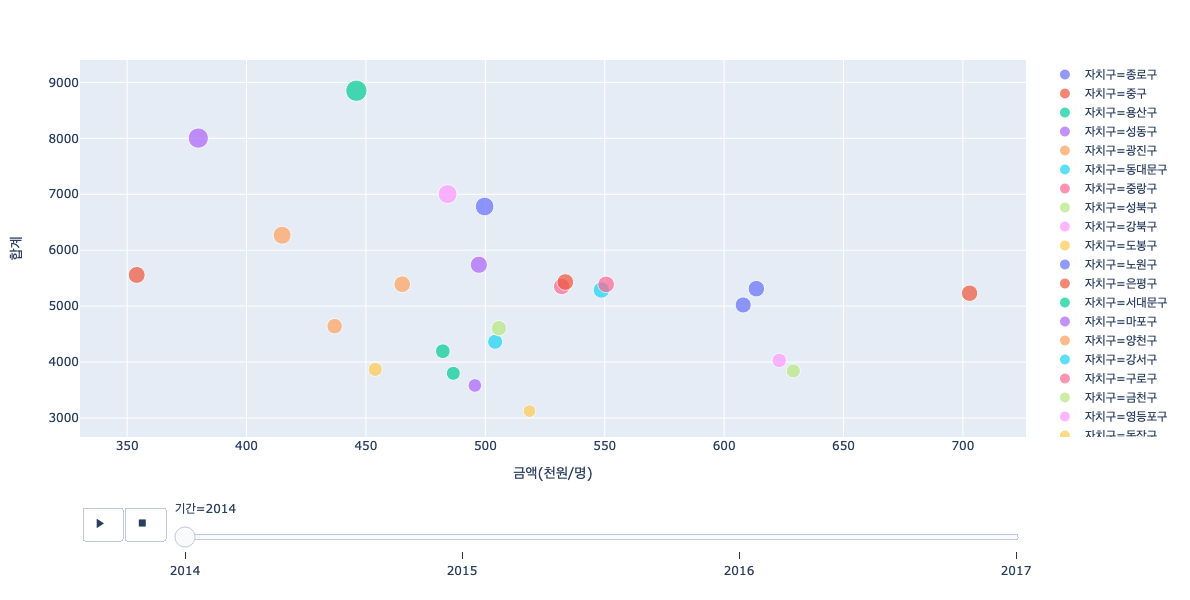

In [41]:
fig = px.scatter(result, x='금액(천원/명)', y='합계',
              color='자치구', size_max=15, size='합계', width=600, height=600
                ,animation_frame='기간')
fig.show()

In [42]:
# 0.4는 적어 보이지만, 사회과학에서는 유의미한 값으로 활용됨
# 2017년 구별 복지예산과 각 범죄 발생건수 별 상관계수
for_corr = result[result['기간']==2017][['금액(천원/명)', '합계', '살인', '강도', '강간강제추행', '절도', '폭력']]
for_corr.corr(method='pearson')

,금액(천원/명),합계,살인,강도,강간강제추행,절도,폭력
금액(천원/명),1.000000,-0.406691,-0.048969,-0.199930,-0.403537,-0.456064,-0.314371
합계,-0.406691,1.000000,0.497344,0.516360,0.768559,0.956593,0.960722
살인,-0.048969,0.497344,1.000000,0.111101,0.298272,0.425596,0.535682
강도,-0.199930,0.516360,0.111101,1.000000,0.570856,0.568225,0.390260
강간강제추행,-0.403537,0.768559,0.298272,0.570856,1.000000,0.719540,0.663319
절도,-0.456064,0.956593,0.425596,0.568225,0.719540,1.000000,0.848886
폭력,-0.314371,0.960722,0.535682,0.390260,0.663319,0.848886,1.000000


### 1인당 사회복지 예산액과 강간강제추행, 절도는 음의 상관관계를 가짐
* 한계점 : 상관계수의 절대값이 0.6만 되었어도 더 행복했을 것

### 2. 구별 지하철 역 개수

* 사용한 데이터
    * 서울시 5대 범죄 발생현황 통계 (구별) (2014~2018)
    * 서울시 자치구별 지하철역 수 (2019)
* 지하철역이라구요?? : 유동인구와 관련되었을 것이라 추측


In [43]:
subway = pd.read_csv('./데이터/서울 자치구별 전철역 수 - Sheet1.csv', encoding='utf-8')
subway

,자치구,전철역 수
0,강남구,29
1,중구,23
2,송파구,22
3,마포구,22
4,강서구,21
5,영등포구,19
6,성동구,19
7,서초구,19
8,용산구,18
9,노원구,18


In [44]:
merged = crime_most_five[crime_most_five['기간'] == 2018].merge(subway, how='left').drop(columns='기간')
merged # 2018년 구별 지하철 역 갯수

,자치구,합계,살인,강도,강간강제추행,절도,폭력,전철역 수
0,종로구,3690,6,3,236,1483,1962,15
1,중구,4030,2,11,207,1855,1955,23
2,용산구,3411,1,3,331,1096,1980,18
3,성동구,2457,2,5,126,999,1325,19
4,광진구,3915,7,2,229,1769,1908,11
5,동대문구,3680,2,5,145,1447,2081,11
6,중랑구,4288,4,3,174,1526,2581,14
7,성북구,3042,7,1,183,1164,1687,9
8,강북구,3437,8,7,188,1112,2122,3
9,도봉구,2249,1,5,113,781,1349,7


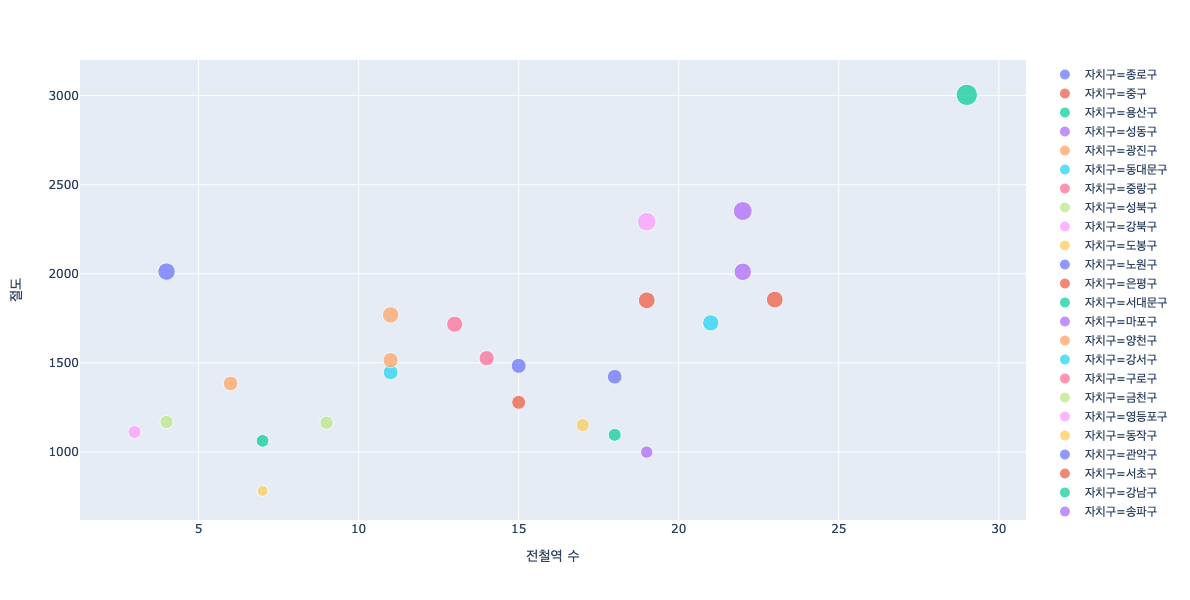

In [45]:
fig = px.scatter(merged
                         ,x='전철역 수'
                         ,y='절도'
                         ,color='자치구'
                         ,size_max=15
                         ,size='절도'
                         ,width=600, height=600)
fig.show()

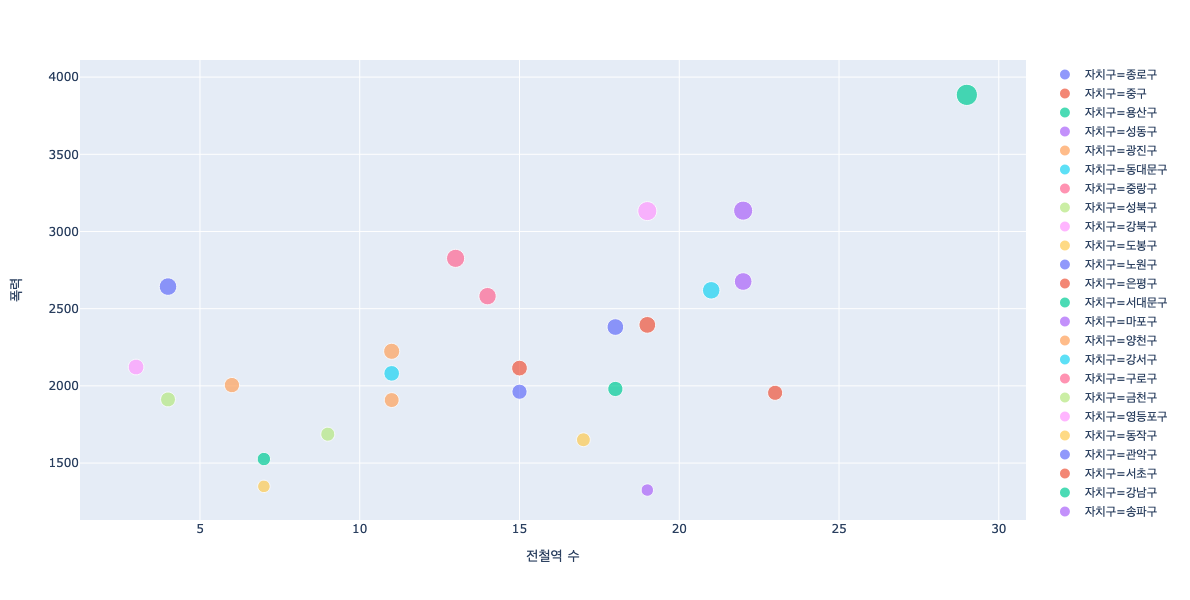

In [46]:
fig = px.scatter(merged, x='전철역 수', y='폭력'
                 ,color='자치구'
                 ,size_max=15
                 ,size='폭력'
                 ,width=600, height=600)
fig.show()

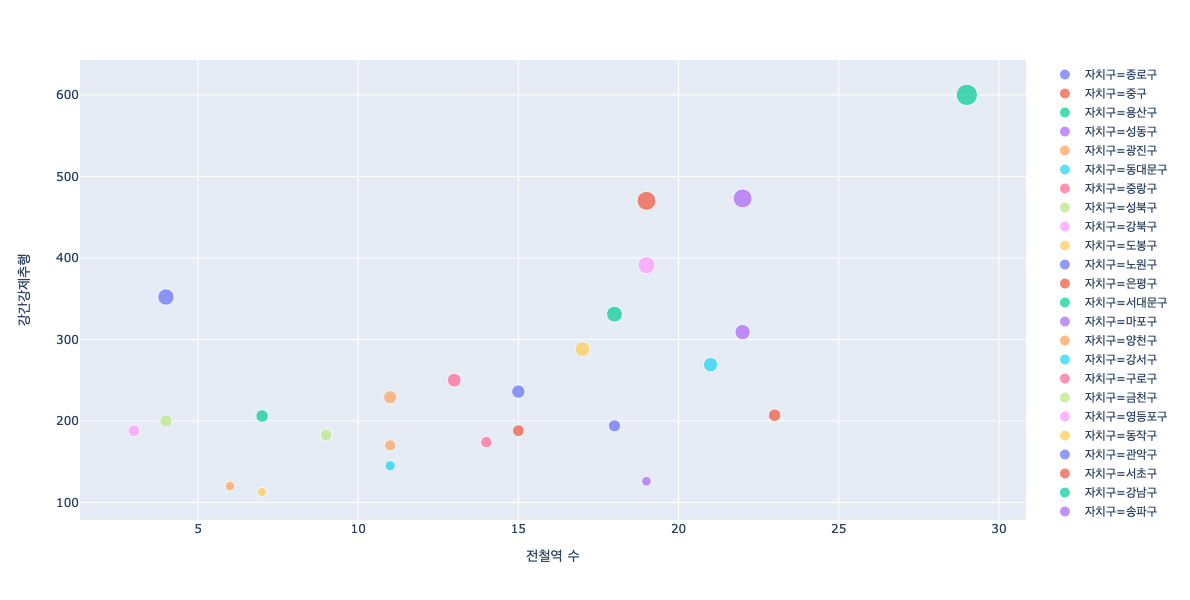

In [47]:
fig = px.scatter(merged, x='전철역 수', y='강간강제추행'
                 ,color='자치구'
                 ,size_max=15
                 ,size='강간강제추행'
                 ,width=600, height=600)
fig.show()

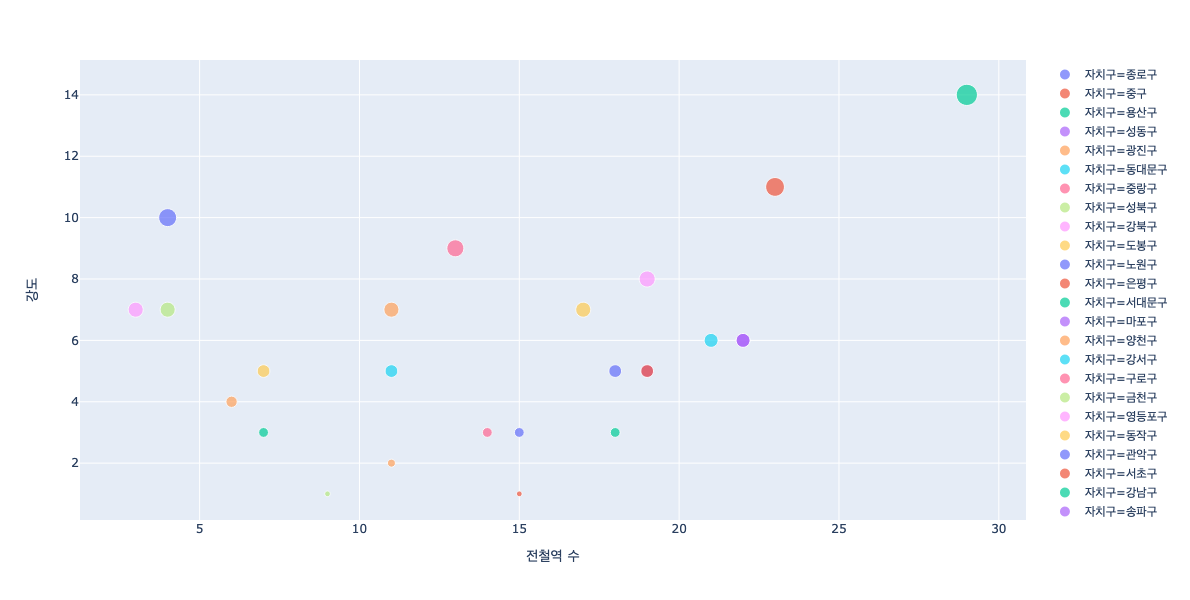

In [48]:
fig = px.scatter(merged, x='전철역 수', y='강도'
                 ,color='자치구'
                 ,size_max=15
                 ,size='강도'
                 ,width=600, height=600)
fig.show()

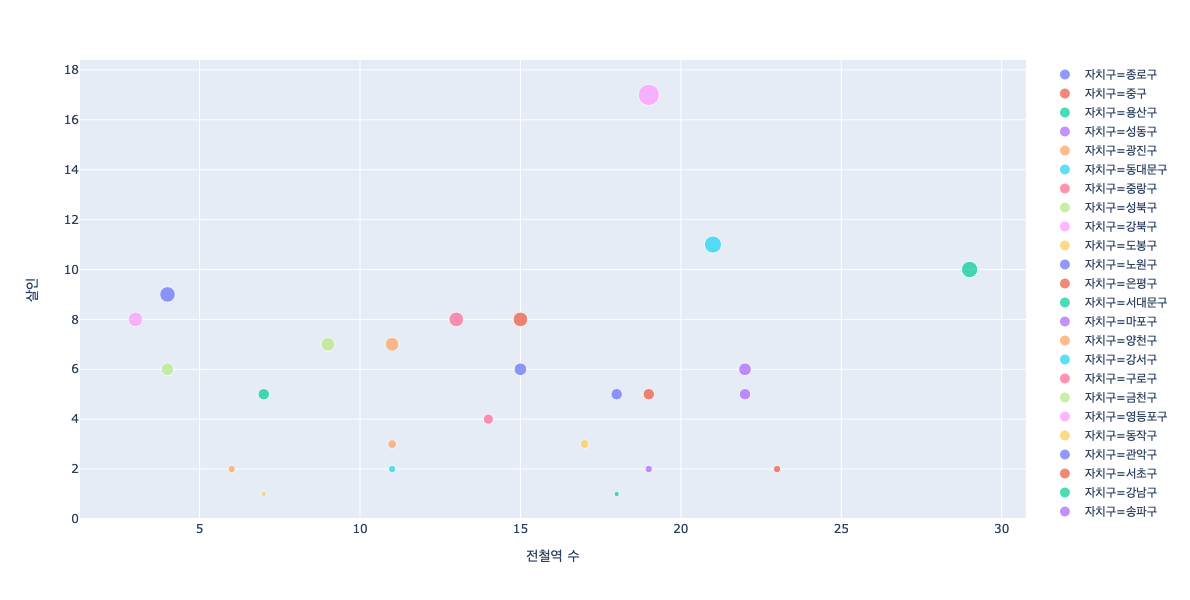

In [49]:
fig = px.scatter(merged, x='전철역 수', y='살인'
                 ,color='자치구'
                 ,size_max=15
                 ,size='살인'
                 ,width=600, height=600)
fig.show()

In [50]:
# 2018년 구별 지하철 역 갯수와 각 범죄 발생건수 간의 상관관계
merged.corr(method='pearson')

,합계,살인,강도,강간강제추행,절도,폭력,전철역 수
합계,1.000000,0.594612,0.606587,0.801312,0.971584,0.974444,0.580999
살인,0.594612,1.000000,0.271016,0.469315,0.542147,0.607344,0.140307
강도,0.606587,0.271016,1.000000,0.496463,0.609513,0.569268,0.318223
강간강제추행,0.801312,0.469315,0.496463,1.000000,0.767011,0.717707,0.592739
절도,0.971584,0.542147,0.609513,0.767011,1.000000,0.902027,0.599340
폭력,0.974444,0.607344,0.569268,0.717707,0.902027,1.000000,0.512349
전철역 수,0.580999,0.140307,0.318223,0.592739,0.599340,0.512349,1.000000


### 구별 지하철 역 개수와 5대 강력범죄 중 절도, 폭력, 성범죄는 양의 상관관계를 가지고 있음
* 유동인구가 많은 것이 원인으로 추측됨

### 3. 서울 주민등록 전입지별 인구이동 
* 사용한 데이터
     * 서울시 5대 범죄 발생현황 통계 (구별) (2014~2018)
     * 서울시 주민등록 전입지별 인구이동 (2014-2018)
     * 주거지를 옮기는 사람의 수가 많으면, 지역 공동체가 형성되기 힘들며, 이는 곧 상호감시체계가 약함을 뜻함

In [51]:
move  = pd.read_csv('./데이터/서울시 주민등록 전입지별 인구이동.csv', encoding='utf-8')
move

,기간,자치구,성별,합계,시내,시내.1,시내.2,부산,대구,인천,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,기간,자치구,성별,합계,소계,구내,구간,부산,대구,인천,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
1,2014,서울시,합계,"1,573,594","1,098,023","495,401","602,622","20,616","13,735","34,380",...,"1,497","249,701","20,174","13,291","19,841","15,902","14,607","16,796","17,144","5,739"
2,2014,서울시,남자,"778,712","538,581","239,660","298,921","10,491","7,127","17,524",...,746,"125,722","10,201","6,709","9,812","7,987","7,291","8,463","8,850","2,966"
3,2014,서울시,여자,"794,882","559,442","255,741","303,701","10,125","6,608","16,856",...,751,"123,979","9,973","6,582","10,029","7,915","7,316","8,333","8,294","2,773"
4,2014,종로구,합계,"24,191","15,750","4,507","11,243",541,370,499,...,45,"3,882",402,212,327,287,243,381,413,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,2018,송파구,남자,"48,997","33,297","15,826","17,471",570,423,757,...,135,"9,171",724,465,507,422,381,450,503,239
387,2018,송파구,여자,"52,063","35,849","17,192","18,657",661,437,753,...,134,"9,152",742,480,629,522,423,523,513,247
388,2018,강동구,합계,"59,334","41,838","24,240","17,598",503,362,791,...,106,"10,734",898,523,619,453,464,533,472,194
389,2018,강동구,남자,"29,591","20,748","12,077","8,671",250,183,394,...,58,"5,460",436,289,323,214,227,261,233,103


In [52]:
cache = move.drop(0)
cache1 = cache[(cache['성별'] == '합계') & (cache['자치구'] != '서울시')][['기간', '자치구', '합계']]
cache1.rename(columns={'합계' : '이동한 인구 수'}, inplace=True)
cache1['이동한 인구 수'] = cache1['이동한 인구 수'].str.replace(',', '')
cache1['이동한 인구 수'] = cache1['이동한 인구 수'].astype(int)

In [53]:
cache1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 4 to 388
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기간        125 non-null    object
 1   자치구       125 non-null    object
 2   이동한 인구 수  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.9+ KB


In [54]:
cache1['기간'] = cache1['기간'].astype(int)
moved_num = cache1

In [55]:
result = moved_num.merge(crime_most_five, how='left')
result

,기간,자치구,이동한 인구 수,합계,살인,강도,강간강제추행,절도,폭력
0,2014,종로구,24191,5021,3,12,226,2272,2508
1,2014,중구,20105,5231,6,13,221,2576,2415
2,2014,용산구,35618,3799,1,7,213,1560,2018
3,2014,성동구,46521,3582,1,5,141,1753,1682
4,2014,광진구,56778,6268,8,16,249,3167,2828
...,...,...,...,...,...,...,...,...,...
120,2018,관악구,94403,5026,9,10,352,2012,2643
121,2018,서초구,74658,4726,5,5,470,1851,2395
122,2018,강남구,91611,7513,10,14,600,3004,3885
123,2018,송파구,101060,5807,5,6,309,2352,3135


In [56]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기간        125 non-null    int64 
 1   자치구       125 non-null    object
 2   이동한 인구 수  125 non-null    int64 
 3   합계        125 non-null    int64 
 4   살인        125 non-null    int64 
 5   강도        125 non-null    int64 
 6   강간강제추행    125 non-null    int64 
 7   절도        125 non-null    int64 
 8   폭력        125 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 9.8+ KB


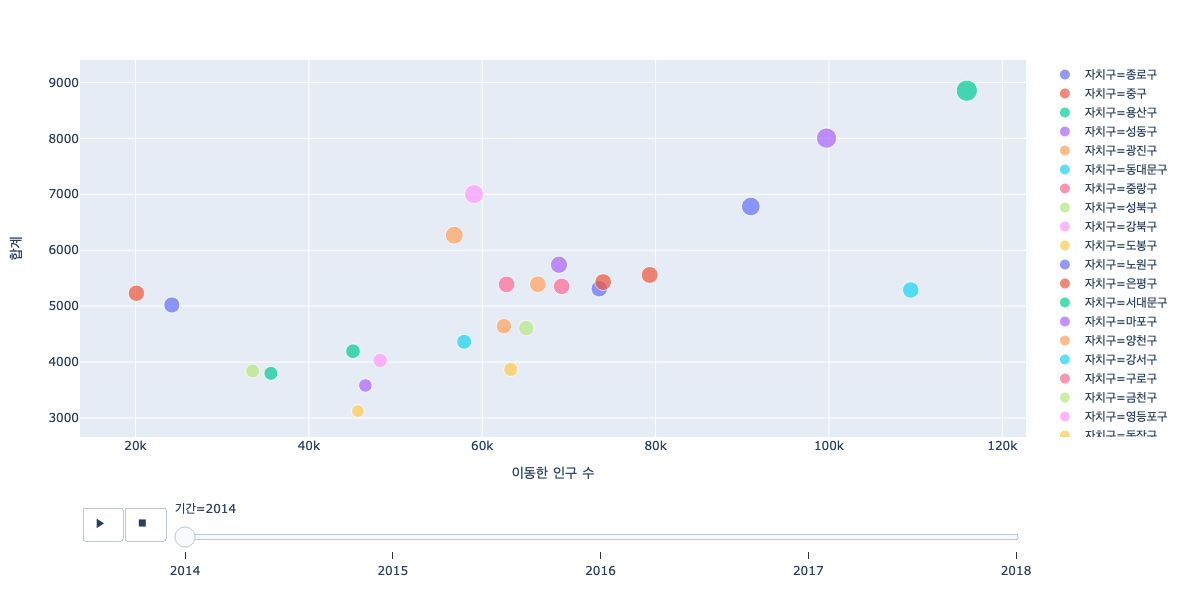

In [57]:
fig = px.scatter(result, x='이동한 인구 수', y='합계',
              color='자치구', size_max=15, size='합계', width=600, height=600
                ,animation_frame='기간')
fig.show()

In [58]:
# 2018년 이동한 인구 수와 각 범죄 발생건수 간의 상관계수
for_corr3 = result[result['기간'] == 2018].loc[:, '이동한 인구 수':]
for_corr3.corr(method='pearson')

,이동한 인구 수,합계,살인,강도,강간강제추행,절도,폭력
이동한 인구 수,1.000000,0.626943,0.382918,0.244559,0.504526,0.594899,0.623106
합계,0.626943,1.000000,0.594612,0.606587,0.801312,0.971584,0.974444
살인,0.382918,0.594612,1.000000,0.271016,0.469315,0.542147,0.607344
강도,0.244559,0.606587,0.271016,1.000000,0.496463,0.609513,0.569268
강간강제추행,0.504526,0.801312,0.469315,0.496463,1.000000,0.767011,0.717707
절도,0.594899,0.971584,0.542147,0.609513,0.767011,1.000000,0.902027
폭력,0.623106,0.974444,0.607344,0.569268,0.717707,0.902027,1.000000


## 3. 지도 위에 그려보기 : Interactive Map with Folium

In [59]:
import json
import folium

In [60]:
# 서울 시군구의 위치정보를 담고 있는 geojson 파일 사용
with open('시군구_위치데이터/seoul_municipalities_geo.json', encoding='utf-8') as seoul_json:
    data = json.load(seoul_json)

In [61]:
# 최대 범죄발생 수를 1도 두고, 나머지 지역의 범죄 발생 수를 비율로 환산
# 지역구 별 색의 투명도를 다르게 하기 위함
cache = crime_most_five[crime_most_five['기간'] == 2018]
max_crime = cache[['살인']].max()
for each in data["features"]:
    temp_geojson = {"features":[each], "type":"FeatureCollection"}
    print(((cache[cache['자치구'] == temp_geojson["features"][0]["properties"]["SIG_KOR_NM"]]['살인'].iloc[0]) / (max_crime[0])))

0.058823529411764705
0.47058823529411764
0.11764705882352941
0.17647058823529413
0.35294117647058826
0.47058823529411764
0.35294117647058826
0.47058823529411764
0.23529411764705882
0.5882352941176471
0.6470588235294118
0.11764705882352941
0.17647058823529413
0.4117647058823529
0.35294117647058826
0.5294117647058824
0.29411764705882354
0.4117647058823529
0.29411764705882354
0.29411764705882354
0.11764705882352941
0.29411764705882354
0.11764705882352941
1.0
0.058823529411764705


In [62]:
crime_most_five[crime_most_five['기간'] == 2018][['살인']].max()
crime_most_five[crime_most_five['기간'] == 2018]

,자치구,기간,합계,살인,강도,강간강제추행,절도,폭력
0,종로구,2018,3690,6,3,236,1483,1962
1,중구,2018,4030,2,11,207,1855,1955
2,용산구,2018,3411,1,3,331,1096,1980
3,성동구,2018,2457,2,5,126,999,1325
4,광진구,2018,3915,7,2,229,1769,1908
5,동대문구,2018,3680,2,5,145,1447,2081
6,중랑구,2018,4288,4,3,174,1526,2581
7,성북구,2018,3042,7,1,183,1164,1687
8,강북구,2018,3437,8,7,188,1112,2122
9,도봉구,2018,2249,1,5,113,781,1349


In [99]:
def create_seoul_crime_map(crime_most_five, crime_name, year, color):
    # 지도를 그리는 함수
    m = folium.Map(location=[37.541, 126.986], zoom_start=11) # 지도 객체 생성
    cache = crime_most_five[crime_most_five['기간'] == year] # 2018년
    max_crime = cache[[crime_name]].max()[0] # 범죄 최고값
    layer_geom_dict = {} # 자치구별 레이어가 들어갈 딕셔너리

    for each in cache['자치구']:
        layer_geom_dict[each] = folium.FeatureGroup(name=each ,control=True)
        # 자치구별 레이어 생성

    for each in data["features"]:
        style_function = lambda x: {'color':color, 'fillColor' : color, 'fillOpacity' : x['properties']['opacity'], 'weight' : 1}
            # 매번 새로 만들어주어야 안겹침
        
        temp_geojson = {"features":[each], "type":"FeatureCollection"}
        crime_num = cache[cache['자치구'] == temp_geojson["features"][0]["properties"]["SIG_KOR_NM"]][crime_name].iloc[0]
        r =  (crime_num / max_crime) * 255 # 색깔 값 지정
        opa = (crime_num / max_crime) # 투명도 값 지정
        temp_geojson['features'][0]['properties']['opacity'] = opa
        
        crime_name_display = ''
        if crime_name == '살인':
            crime_name_display = 'murder'
        elif crime_name == '강도':
            crime_name_display = 'robbery'
        elif crime_name == '절도':
            crime_name_display = 'theft'
        elif crime_name == '강간강제추행':
            crime_name_display = 'sexual assault'
        elif crime_name == '폭력':
            crime_name_display = 'violence'
            
        color_rate = (crime_num / max_crime)
        temp_geojson_layer = folium.GeoJson(temp_geojson,
                                            highlight_function=lambda x: {'weight':3, 'color':'black', 'fillColor' : 'black'},
                                            control=False,
                                            style_function=style_function,
                                            tooltip=temp_geojson["features"][0]["properties"]["SIG_ENG_NM"] + ' , ' + crime_name_display + ' count : ' +  str(crime_num))
        temp_geojson_layer.add_to(layer_geom_dict[temp_geojson["features"][0]["properties"]["SIG_KOR_NM"]])
    for each in layer_geom_dict.values():
        each.add_to(m)

    folium.LayerControl(autoZIndex=False, collapsed=True).add_to(m)
    return m

### 렌더링 된 interactive map

* 환경의 차이로 인해 ipywidget아 렌더링되지 않을 수 있습니다.
* 그럴 때에는 아래 링크를 클릭하시면 별도로 렌더링 된 지도를 확인하실 수 있습니다.
    * [2018년 살인 지도 확인](https://limyj0708.github.io/Five_felony_crimes_seoul_visualization/interactive_map_%EC%82%B4%EC%9D%B8.html)
    * [2018년 강도 지도 확인](https://limyj0708.github.io/Five_felony_crimes_seoul_visualization/interactive_map_%EA%B0%95%EB%8F%84.html)
    * [2018년 절도 지도 확인](https://limyj0708.github.io/Five_felony_crimes_seoul_visualization/interactive_map_%EC%A0%88%EB%8F%84.html)
    * [2018년 폭력 지도 확인](https://limyj0708.github.io/Five_felony_crimes_seoul_visualization/interactive_map_%ED%8F%AD%EB%A0%A5.html)
    * [2018년 강간강제추행 지도 확인](https://limyj0708.github.io/Five_felony_crimes_seoul_visualization/interactive_map_%EA%B0%95%EA%B0%84%EA%B0%95%EC%A0%9C%EC%B6%94%ED%96%89.html)

In [100]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [101]:
interact(create_seoul_crime_map,
         crime_most_five=fixed(crime_most_five),
         crime_name=['살인', '강도', '절도', '폭력', '강간강제추행'],
         year=(2014, 2017, 1),
         color=['darkred', 'darkblue', 'purple', 'green'])

interactive(children=(Dropdown(description='crime_name', options=('살인', '강도', '절도', '폭력', '강간강제추행'), value='살인…

<function __main__.create_seoul_crime_map(crime_most_five, crime_name, year, color)>

In [102]:
# 지도를 별도의 html 파일로 추출
# 연도, 범죄종류, 색 지정 가능
create_seoul_crime_map(crime_most_five, '살인', 2018, 'darkred').save('interactive_map_살인.html')
create_seoul_crime_map(crime_most_five, '강도', 2018, 'darkblue').save('interactive_map_강도.html')
create_seoul_crime_map(crime_most_five, '절도', 2018, 'purple').save('interactive_map_절도.html')
create_seoul_crime_map(crime_most_five, '폭력', 2018, 'green').save('interactive_map_폭력.html')
create_seoul_crime_map(crime_most_five, '강간강제추행', 2018, 'black').save('interactive_map_강간강제추행.html')

## 4. 다중회귀모형

In [69]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [70]:
for_modeling_result=pd.read_csv('./데이터/for_modeling_result.csv')
for_modeling_result.head()

,자치구,기간,합계,살인,강도,강간강제추행,절도,폭력,금액(천원/명),상대격차(배),절대격차(천원/명),이사간 인구 수,지하철 역 수
0,강남구,2014,8851,13,37,512,3895,4394,446.0,0.90,-52.1,115906,29
1,종로구,2014,5021,3,12,226,2272,2508,608.0,1.22,109.8,24191,15
2,마포구,2014,5740,4,22,265,2763,2686,497.3,1.00,-0.8,68853,22
3,중구,2014,5231,6,13,221,2576,2415,702.8,1.41,204.7,20105,23
4,중랑구,2014,5353,11,14,163,2390,2775,532.0,1.07,33.8,69157,14


In [71]:
# statsmodels 모델에서 컬럼명에 공백을 허용하지않아 컬럼명 변경
for_modeling_rename=for_modeling_result.rename(columns={'이사간 인구 수':'이사인구', '지하철 역 수':'지하철역수', '금액(천원/명)':'인당복지예산'})
for_modeling_rename.head()

,자치구,기간,합계,살인,강도,강간강제추행,절도,폭력,인당복지예산,상대격차(배),절대격차(천원/명),이사인구,지하철역수
0,강남구,2014,8851,13,37,512,3895,4394,446.0,0.90,-52.1,115906,29
1,종로구,2014,5021,3,12,226,2272,2508,608.0,1.22,109.8,24191,15
2,마포구,2014,5740,4,22,265,2763,2686,497.3,1.00,-0.8,68853,22
3,중구,2014,5231,6,13,221,2576,2415,702.8,1.41,204.7,20105,23
4,중랑구,2014,5353,11,14,163,2390,2775,532.0,1.07,33.8,69157,14


In [72]:
# 다중선형회귀 적합
model = smf.ols(formula = '합계 ~ 인당복지예산 + 이사인구 + 지하철역수', data = for_modeling_rename)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     합계   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     34.25
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           3.88e-15
Time:                        19:20:29   Log-Likelihood:                -820.92
No. Observations:                 100   AIC:                             1650.
Df Residuals:                      96   BIC:                             1660.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3435.0732    790.867      4.343      0.000    1865.214    5004.932
인당복지예산        -1.8037      0.943     -1.913      0.059      -3.675       0.068
이사인구           0.0247      0.005      4.912      0.000       0.015       0.035
지하철역수         67.7401     14.117      4.798      0.000      39.717      95.763
==============================================================================
Omnibus:                        2.535   Durbin-Watson:                   2.478
Prob(Omnibus):                  0.282   Jarque-Bera (JB):                1.888
Skew:                          -0.161   Prob(JB):                        0.389
Kurtosis:                       2.409   Cond. No.                     5.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 회귀모형 산출 결과
* 회귀식 : y = 3435.0732 - 1.8037 * 인당복지예산 + 0.0247 * 이사인구 + 67.7401 * 지하철역수
* 데이터의 질에 비하면 괜찮은 결정계수(R-squared) 값과 p-value가 나왔다.